In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Corrfunc as Cf
import read_lognormal

In [2]:
Lx, Ly, Lz, N, data = read_lognormal.read('lognormal_mocks/cat_L750_n3e-4_lognormal_rlz0.bin')
x, y, z, vx, vy, vz = data.T

In [3]:
len(x)

125342

In [4]:
boxsize = Lx

In [5]:
nthreads = 2
rmin = 0.1
rmax = 100.0
nbins = 30
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1)

In [6]:
pimax = 40.0

In [7]:
mu_max = 1.0
nmu_bins = 20

In [8]:
autocorr = 1

### 2D projected auto-correlation for mock

In [9]:
results_wp = Cf.theory.wp(boxsize, pimax, nthreads, rbins, x, y, z)

In [10]:
rbins.shape

(31,)

In [11]:
results_wp.shape

(30,)

[]

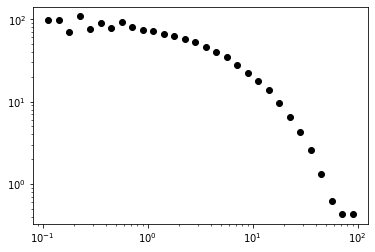

In [12]:
%matplotlib inline
plt.plot(0.5 * (rbins[1:] + rbins[:-1]), results_wp["wp"], "ko")
plt.loglog()

### 3D autocorrelation for mock

In [13]:
results_xi = Cf.theory.xi(boxsize, nthreads, rbins, x, y, z)

In [14]:
results_xi.shape

(30,)

[]

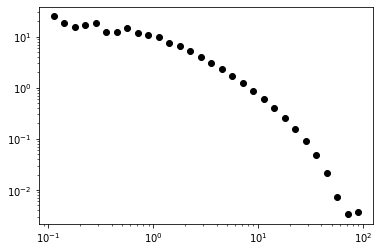

In [15]:
plt.plot(0.5 * (rbins[1:] + rbins[:-1]), results_xi["xi"], "ko")
plt.loglog()

### 2D projected auto-correlation for random cat

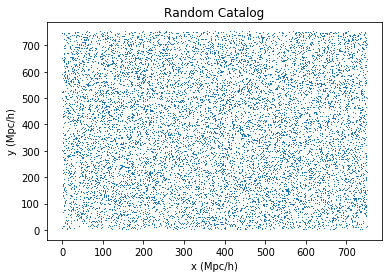

In [16]:
%run jun28-random-cat-generation.ipynb

In [17]:
data_rand.shape

(125342, 3)

In [18]:
results_wp_rand = Cf.theory.wp(boxsize, pimax, nthreads, rbins, x_rand, y_rand, z_rand)

In [19]:
results_wp_rand.shape

(30,)

[]

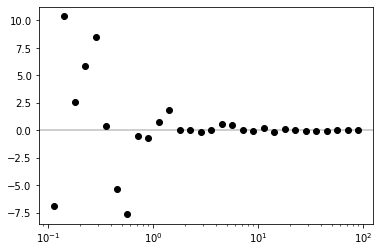

In [20]:
plt.plot(0.5 * (rbins[1:] + rbins[:-1]), results_wp_rand["wp"], "ko")
plt.axhline(0.0, color="k", alpha=0.25)
plt.semilogx()

### 3D autocorrelation for random cat

In [21]:
results_xi_rand = Cf.theory.xi(boxsize, nthreads, rbins, x_rand, y_rand, z_rand)

In [22]:
results_xi_rand.shape

(30,)

[]

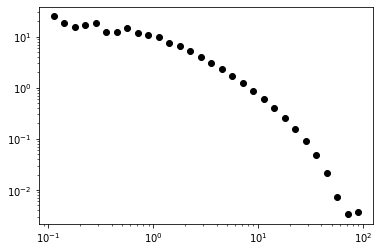

In [23]:
plt.plot(0.5 * (rbins[1:] + rbins[:-1]), results_xi["xi"], "ko")
plt.axhline(0.0, color="k", alpha=0.25)
plt.loglog()

### linear scale for kate's benefit

In [24]:
nthreads = 2
rmin = 10.0
rmax = 150.0
nbins = 30
rbins = np.linspace(rmin, rmax, nbins + 1)

In [25]:
results_xi = Cf.theory.xi(boxsize, nthreads, rbins, x, y, z)

(-0.01, 0.1)

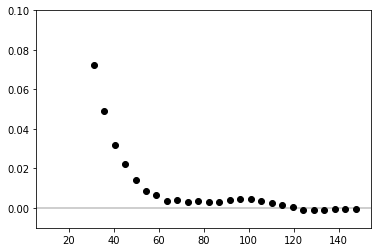

In [26]:
plt.plot(0.5 * (rbins[1:] + rbins[:-1]), results_xi["xi"], "ko")
plt.axhline(0.0, color="k", alpha=0.25)
plt.ylim(-0.01, 0.1)

In [27]:
results_xi_rand = Cf.theory.xi(boxsize, nthreads, rbins, x_rand, y_rand, z_rand)

(-0.01, 0.1)

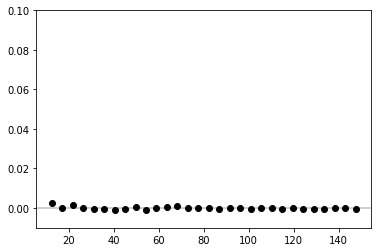

In [28]:
plt.plot(0.5 * (rbins[1:] + rbins[:-1]), results_xi_rand["xi"], "ko")
plt.axhline(0.0, color="k", alpha=0.25)
plt.ylim(-0.01, 0.1)

In [29]:
Cf.__author__

'Kate Storey-Fisher <kstoreyfisher@gmail.com>'